In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "test_set_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [4]:
with open(dPath / "rf_exp_original_12_paper.pkl", 'rb') as filename:
    rf = pickle.load(filename)

In [5]:
names = ['MutatorClass','numAssertInTC','numAssertInTM','numExecuted','numTestCover','ppavcc','pploc','ppmaintainabilityIndex','ppmaintainabilityIndexNC','ppnumberOfClasses','ppnumberOfStatements','pptcc']

In [6]:
X_test = []
y_test = []

In [7]:
for i in range(len(test_data)):
    test_data[i] = test_data[i][test_data[i].numExecuted > 0]
    X_test.append(test_data[i].drop("Detected", axis=1))
    y_test.append(test_data[i].Detected)
    X_test[i] = test_data[i][names]

In [8]:
for i in range(len(test_data)):
    X_test[i] = X_test[i][names]

In [9]:
with open(dPath / "mutclslabels.pkl", 'rb') as filename:
    mutclslabels = pickle.load(filename)

In [10]:
with open(dPath / "retypelabels.pkl", 'rb') as filename:
    retypelabels = pickle.load(filename)

In [11]:
mutclscodes = dict(zip(mutclslabels,range(len(mutclslabels))))

In [12]:
retypecodes = dict(zip(retypelabels,range(len(retypelabels))))

In [13]:
for i in range(len(test_data)):
    X_test[i].replace(mutclscodes, inplace=True)
    #X_test[i].replace(retypecodes, inplace=True)

In [14]:
rm_indices = []
for i in range(len(X_test)):
    if X_test[i].shape[0] <= 10:
        rm_indices.append(i)

In [15]:
X_test = [i for j, i in enumerate(X_test) if j not in rm_indices]

In [16]:
y_test = [i for j, i in enumerate(y_test) if j not in rm_indices]

In [17]:
rf_preds = []
for i in range(len(X_test)):  
    rf_preds.append(rf.predict_proba(X_test[i])[:,1])

In [18]:
for i in range(len(X_test)):
    print(rf_preds[i].shape)

(133,)
(809,)
(364,)
(4506,)
(21,)
(128,)
(337,)
(112,)
(349,)
(4697,)
(406,)
(861,)
(3869,)
(542,)
(2033,)
(54,)
(691,)
(287,)
(1301,)
(33,)
(100,)
(261,)
(1943,)
(29,)
(238,)
(153,)
(773,)
(37,)
(248,)
(982,)
(4736,)
(749,)
(1531,)
(104,)
(169,)
(426,)
(2246,)
(522,)
(33,)
(543,)
(102,)
(1475,)
(514,)
(106,)
(2414,)
(46,)
(213,)
(3254,)
(43,)
(3551,)
(188,)
(835,)
(179,)
(3851,)
(690,)
(579,)
(1484,)
(173,)
(296,)
(162,)
(600,)
(89,)
(266,)


In [19]:
balanced_accuracy_scores = []
matthews_corrcoef_scores = []
average_precision_scores = []
roc_auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
log_losses = []
zero_one_loss = []
for i in range(len(rf_preds)):
    try:
        balanced_accuracy_scores.append(metrics.balanced_accuracy_score(y_test[i], rf_preds[i] >= 0.5, adjusted=True))
        matthews_corrcoef_scores.append(metrics.matthews_corrcoef(y_test[i], rf_preds[i] >= 0.5))
        average_precision_scores.append(metrics.average_precision_score(y_test[i], rf_preds[i] >= 0.5))
        roc_auc_scores.append(metrics.roc_auc_score(y_test[i],rf_preds[i] >= 0.5))
        precision_scores.append(metrics.precision_score(y_test[i], rf_preds[i]>= 0.5))
        recall_scores.append(metrics.recall_score(y_test[i], rf_preds[i]>= 0.5))
        f1_scores.append(metrics.f1_score(y_test[i], rf_preds[i]>= 0.5))
        log_losses.append(metrics.log_loss(y_test[i], rf_preds[i] >= 0.5))
        zero_one_loss.append(metrics.zero_one_loss(y_test[i], rf_preds[i] >= 0.5))
    except:
        pass

In [20]:
import matplotlib.pyplot as plt

In [21]:
np.median(roc_auc_scores)

0.5082747285397691

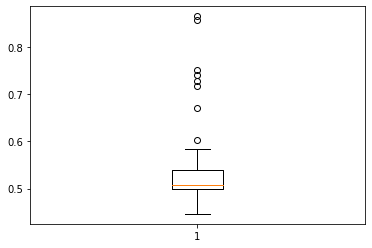

In [22]:
plt.boxplot(np.array(roc_auc_scores));

In [23]:
df = pd.DataFrame([balanced_accuracy_scores,matthews_corrcoef_scores,average_precision_scores,roc_auc_scores,precision_scores,recall_scores,f1_scores,log_losses,zero_one_loss]).T

In [24]:
df.columns = ['balanced_accuracy_scores','matthews_corrcoef_scores','average_precision_scores','roc_auc_scores','precision_scores','recall_scores','f1_scores','log_losses','zero_one_loss']

In [25]:
df.to_excel(dPath / "rf_originial_12_evaluation.xlsx")